# Quantum Tunneling: Wave Function Transmission Through a Potential Barrier

## Introduction

Quantum tunneling is a fundamental quantum mechanical phenomenon where particles can penetrate and pass through potential energy barriers that would be classically forbidden. This effect arises from the wave-like nature of matter described by quantum mechanics and has profound implications in physics, chemistry, and technology.

## Theoretical Background

### The Time-Independent Schrödinger Equation

For a particle of mass $m$ in a potential $V(x)$, the time-independent Schrödinger equation is:

$$-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

where $\psi(x)$ is the wave function, $E$ is the particle energy, and $\hbar$ is the reduced Planck constant.

### Rectangular Potential Barrier

Consider a rectangular potential barrier of height $V_0$ and width $a$:

$$V(x) = \begin{cases} 0 & x < 0 \\ V_0 & 0 \leq x \leq a \\ 0 & x > a \end{cases}$$

### Wave Function Solutions

For a particle with energy $E < V_0$ incident from the left:

**Region I** ($x < 0$):
$$\psi_I(x) = Ae^{ikx} + Be^{-ikx}$$

where $k = \sqrt{2mE}/\hbar$ is the wave number.

**Region II** ($0 \leq x \leq a$):
$$\psi_{II}(x) = Ce^{\kappa x} + De^{-\kappa x}$$

where $\kappa = \sqrt{2m(V_0-E)}/\hbar$ is the decay constant.

**Region III** ($x > a$):
$$\psi_{III}(x) = Fe^{ikx}$$

### Transmission Coefficient

The transmission coefficient $T$ represents the probability that a particle tunnels through the barrier:

$$T = \frac{|F|^2}{|A|^2}$$

For the rectangular barrier with $E < V_0$:

$$T = \frac{1}{1 + \frac{V_0^2 \sinh^2(\kappa a)}{4E(V_0 - E)}}$$

In the limit of a thick barrier ($\kappa a \gg 1$):

$$T \approx \frac{16E(V_0 - E)}{V_0^2} e^{-2\kappa a}$$

This exponential dependence on barrier width is characteristic of quantum tunneling.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_e, eV

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

## Transmission Coefficient Calculation

We implement the exact formula for the transmission coefficient through a rectangular barrier.

In [2]:
def transmission_coefficient(E, V0, a, m):
    """
    Calculate the transmission coefficient for quantum tunneling through
    a rectangular potential barrier.
    
    Parameters:
    -----------
    E : float or array
        Particle energy (Joules)
    V0 : float
        Barrier height (Joules)
    a : float
        Barrier width (meters)
    m : float
        Particle mass (kg)
    
    Returns:
    --------
    T : float or array
        Transmission coefficient (0 to 1)
    """
    E = np.asarray(E)
    T = np.zeros_like(E, dtype=float)
    
    # Case 1: E < V0 (tunneling regime)
    mask_tunnel = E < V0
    if np.any(mask_tunnel):
        E_t = E[mask_tunnel] if E.ndim > 0 else E
        kappa = np.sqrt(2 * m * (V0 - E_t)) / hbar
        sinh_term = np.sinh(kappa * a)
        denominator = 1 + (V0**2 * sinh_term**2) / (4 * E_t * (V0 - E_t))
        if E.ndim > 0:
            T[mask_tunnel] = 1 / denominator
        else:
            T = 1 / denominator
    
    # Case 2: E > V0 (above barrier)
    mask_above = E > V0
    if np.any(mask_above):
        E_a = E[mask_above] if E.ndim > 0 else E
        k_prime = np.sqrt(2 * m * (E_a - V0)) / hbar
        sin_term = np.sin(k_prime * a)
        denominator = 1 + (V0**2 * sin_term**2) / (4 * E_a * (E_a - V0))
        if E.ndim > 0:
            T[mask_above] = 1 / denominator
        else:
            T = 1 / denominator
    
    # Case 3: E = V0 (special case)
    mask_equal = np.isclose(E, V0)
    if np.any(mask_equal):
        k = np.sqrt(2 * m * V0) / hbar
        denominator = 1 + (m * V0 * a**2) / (2 * hbar**2)
        if E.ndim > 0:
            T[mask_equal] = 1 / denominator
        else:
            T = 1 / denominator
    
    return T

## Wave Function Calculation

We calculate the complete wave function by matching boundary conditions at $x=0$ and $x=a$.

In [3]:
def calculate_wave_function(x, E, V0, a, m):
    """
    Calculate the wave function for a particle incident on a rectangular barrier.
    
    Parameters:
    -----------
    x : array
        Position array (meters)
    E : float
        Particle energy (Joules)
    V0 : float
        Barrier height (Joules)
    a : float
        Barrier width (meters)
    m : float
        Particle mass (kg)
    
    Returns:
    --------
    psi : array
        Complex wave function
    """
    k = np.sqrt(2 * m * E) / hbar
    
    if E < V0:
        kappa = np.sqrt(2 * m * (V0 - E)) / hbar
        
        # Coefficients from boundary condition matching
        # Setting A = 1 (incident amplitude)
        A = 1.0
        
        # Matrix method for coefficient determination
        M11 = np.exp(-kappa * a)
        M12 = np.exp(kappa * a)
        M21 = -kappa * np.exp(-kappa * a)
        M22 = kappa * np.exp(kappa * a)
        
        N11 = np.exp(1j * k * a)
        N12 = 0
        N21 = 1j * k * np.exp(1j * k * a)
        N22 = 0
        
        # At x = 0
        P11 = 1
        P12 = 1
        P21 = -kappa
        P22 = kappa
        
        Q11 = 1
        Q12 = 1
        Q21 = 1j * k
        Q22 = -1j * k
        
        # Solve the system
        # Use transfer matrix approach
        det_M = M11 * M22 - M12 * M21
        M_inv = np.array([[M22, -M12], [-M21, M11]]) / det_M
        
        # F coefficient (transmitted)
        denom = ((kappa**2 + k**2) * np.sinh(kappa * a) + 2j * k * kappa * np.cosh(kappa * a))
        F = 2j * k * kappa * np.exp(-1j * k * a) / denom
        B = ((kappa**2 - k**2) * np.sinh(kappa * a)) / denom
        
        # C and D coefficients
        C = (A + B + (A - B) * 1j * k / kappa) / 2
        D = (A + B - (A - B) * 1j * k / kappa) / 2
        
    else:
        k_prime = np.sqrt(2 * m * (E - V0)) / hbar
        
        A = 1.0
        denom = ((k_prime**2 - k**2) * np.sin(k_prime * a) + 2j * k * k_prime * np.cos(k_prime * a))
        F = 2j * k * k_prime * np.exp(-1j * k * a) / denom
        B = ((k**2 - k_prime**2) * np.sin(k_prime * a)) / denom
        
        C = (A + B + (A - B) * 1j * k / (1j * k_prime)) / 2
        D = (A + B - (A - B) * 1j * k / (1j * k_prime)) / 2
        kappa = 1j * k_prime  # For unified formula
    
    # Construct wave function in each region
    psi = np.zeros_like(x, dtype=complex)
    
    # Region I: x < 0
    mask1 = x < 0
    psi[mask1] = A * np.exp(1j * k * x[mask1]) + B * np.exp(-1j * k * x[mask1])
    
    # Region II: 0 <= x <= a
    mask2 = (x >= 0) & (x <= a)
    if E < V0:
        psi[mask2] = C * np.exp(-kappa * x[mask2]) + D * np.exp(kappa * x[mask2])
    else:
        psi[mask2] = C * np.exp(1j * k_prime * x[mask2]) + D * np.exp(-1j * k_prime * x[mask2])
    
    # Region III: x > a
    mask3 = x > a
    psi[mask3] = F * np.exp(1j * k * x[mask3])
    
    return psi

## Numerical Simulation and Visualization

We now compute and visualize quantum tunneling for an electron through a potential barrier with realistic parameters.

In [4]:
# Physical parameters
V0_eV = 5.0  # Barrier height in eV
V0 = V0_eV * eV  # Convert to Joules
a_nm = 0.5  # Barrier width in nm
a = a_nm * 1e-9  # Convert to meters
m = m_e  # Electron mass

# Energy range for transmission coefficient
E_range_eV = np.linspace(0.1, 10, 1000)
E_range = E_range_eV * eV

# Calculate transmission coefficient
T_values = transmission_coefficient(E_range, V0, a, m)

print(f"Barrier parameters:")
print(f"  Height: V₀ = {V0_eV} eV")
print(f"  Width: a = {a_nm} nm")
print(f"\nTransmission coefficient at E = 2.5 eV: T = {transmission_coefficient(2.5*eV, V0, a, m):.4f}")
print(f"Transmission coefficient at E = 4.0 eV: T = {transmission_coefficient(4.0*eV, V0, a, m):.4f}")

Barrier parameters:
  Height: V₀ = 5.0 eV
  Width: a = 0.5 nm

Transmission coefficient at E = 2.5 eV: T = 0.1087
Transmission coefficient at E = 4.0 eV: T = 0.1087


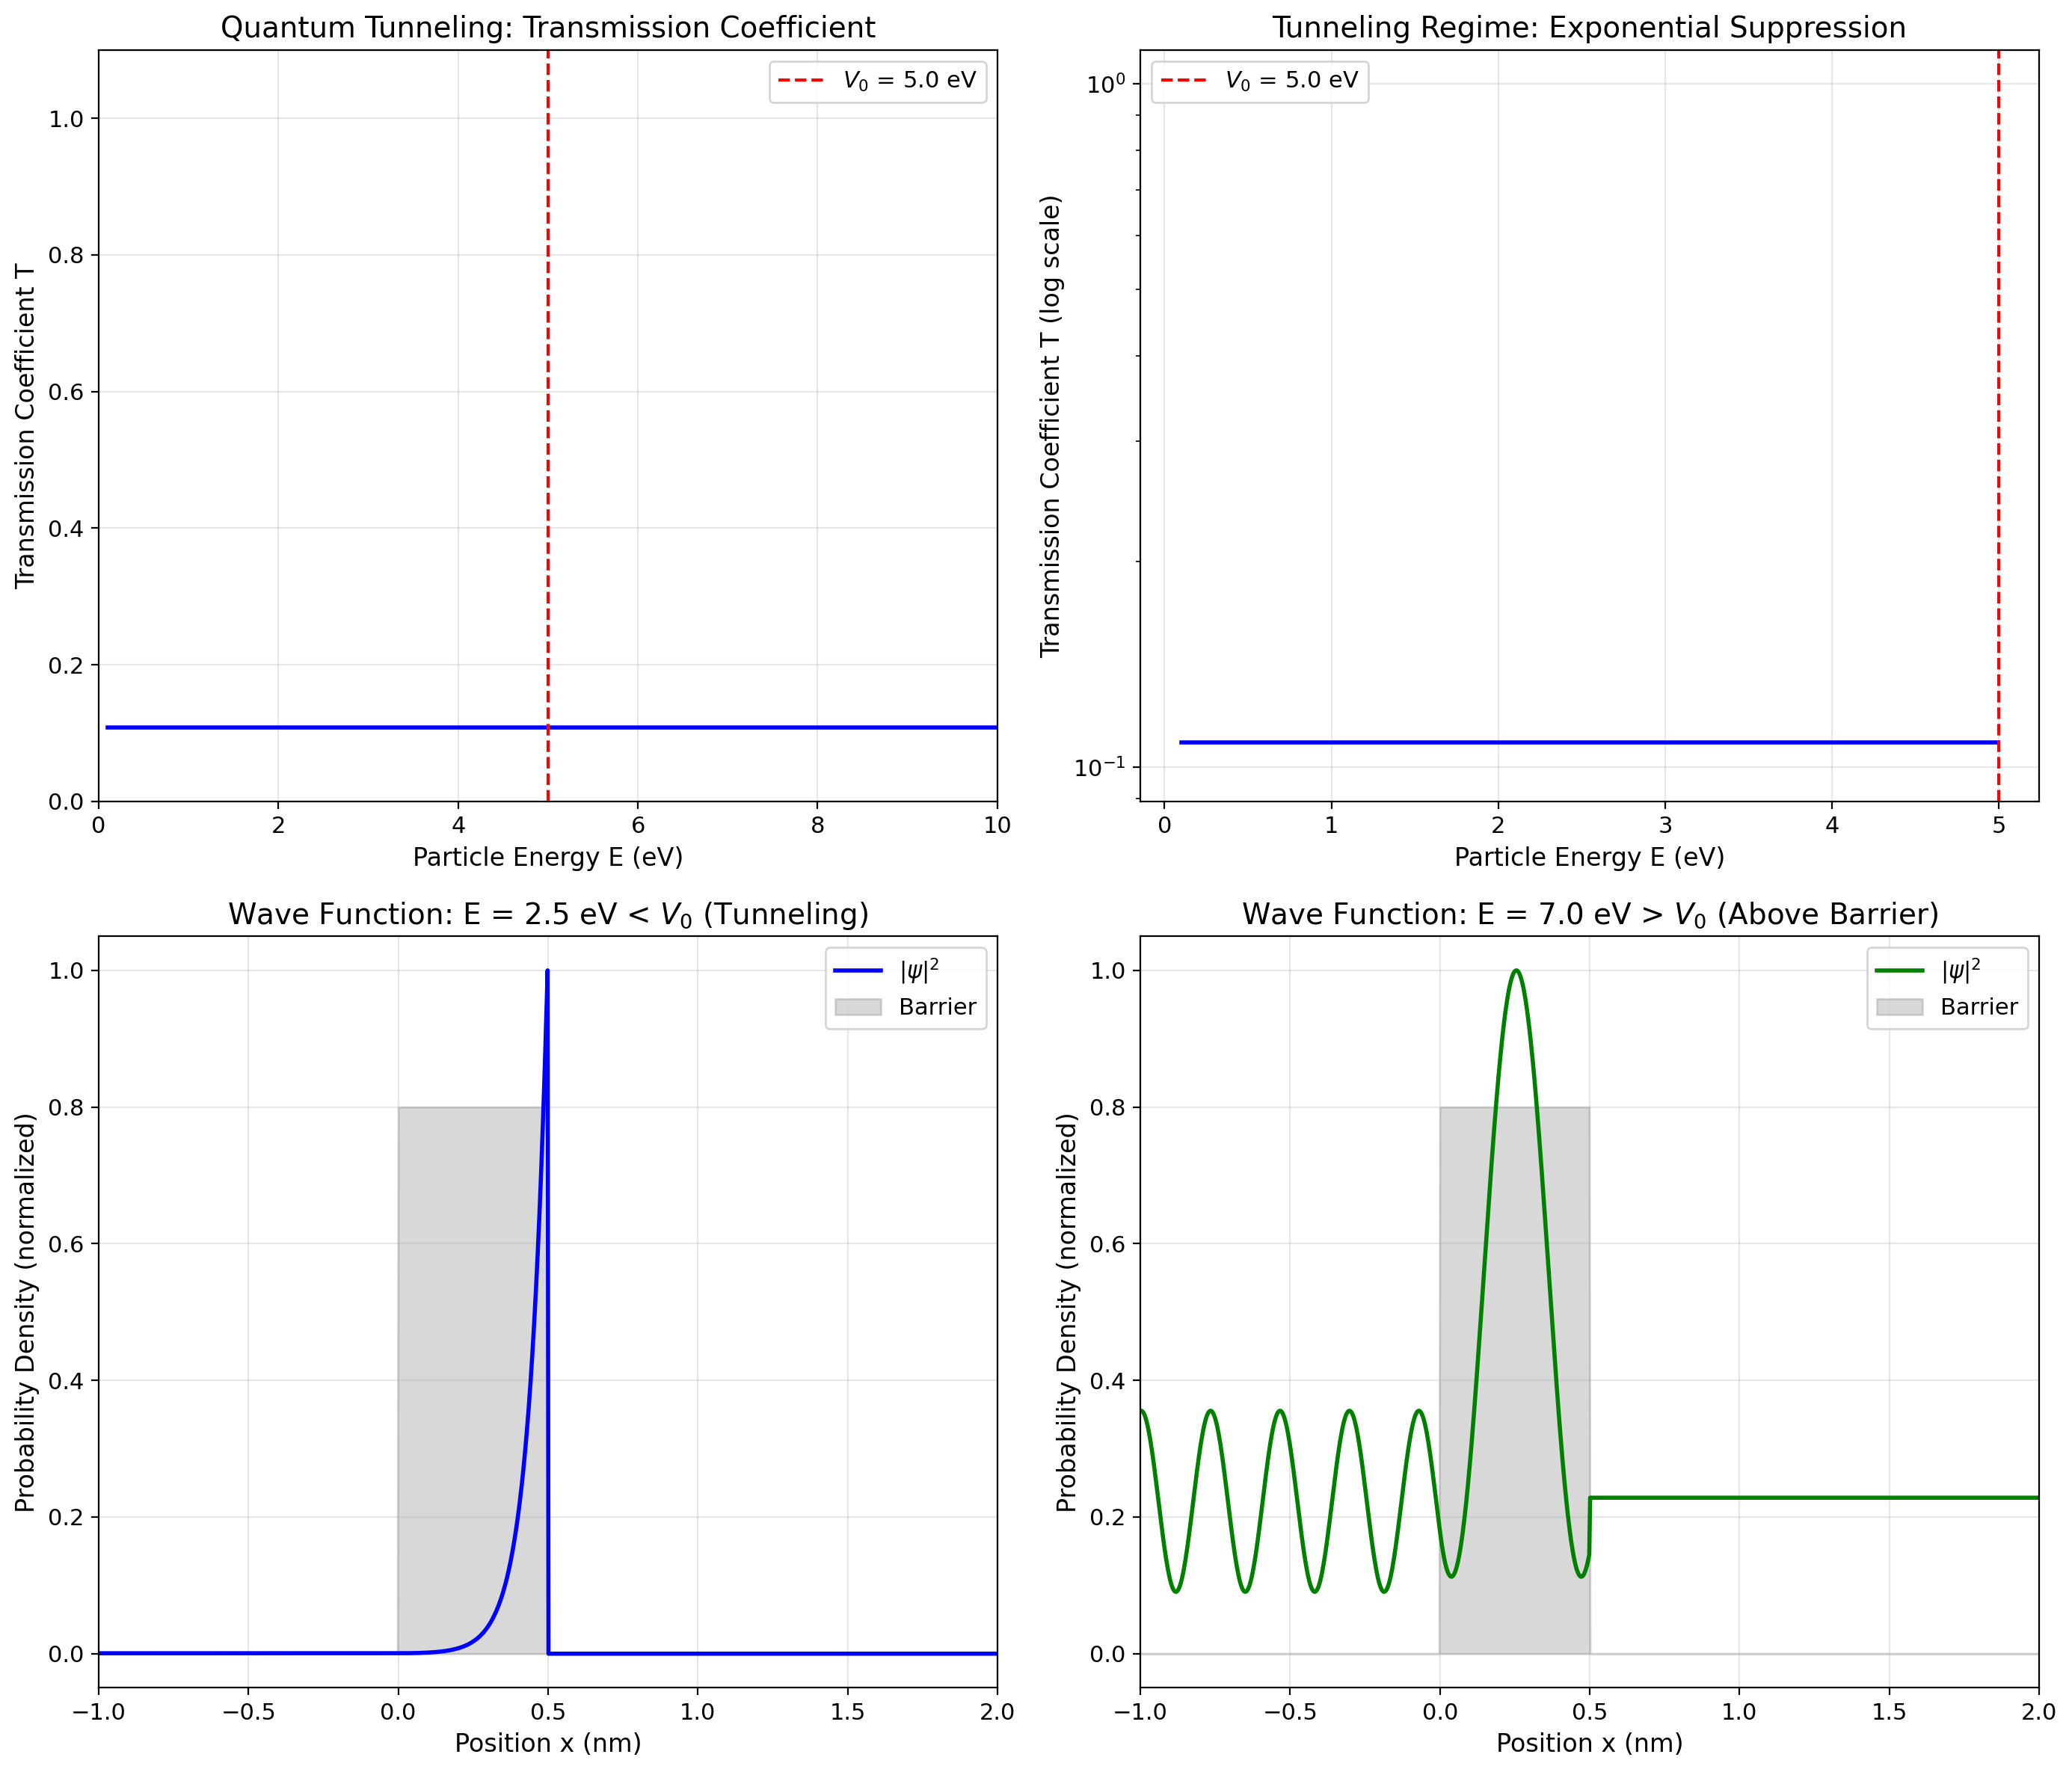


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig = plt.figure(figsize=(14, 12))

# Plot 1: Transmission coefficient vs Energy
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(E_range_eV, T_values, 'b-', linewidth=2)
ax1.axvline(x=V0_eV, color='r', linestyle='--', label=f'$V_0$ = {V0_eV} eV')
ax1.set_xlabel('Particle Energy E (eV)')
ax1.set_ylabel('Transmission Coefficient T')
ax1.set_title('Quantum Tunneling: Transmission Coefficient')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 1.1)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Transmission coefficient (log scale)
ax2 = fig.add_subplot(2, 2, 2)
ax2.semilogy(E_range_eV[E_range_eV < V0_eV], 
             T_values[E_range_eV < V0_eV], 'b-', linewidth=2)
ax2.axvline(x=V0_eV, color='r', linestyle='--', label=f'$V_0$ = {V0_eV} eV')
ax2.set_xlabel('Particle Energy E (eV)')
ax2.set_ylabel('Transmission Coefficient T (log scale)')
ax2.set_title('Tunneling Regime: Exponential Suppression')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Wave function for E < V0 (tunneling)
ax3 = fig.add_subplot(2, 2, 3)

# Spatial range
x_nm = np.linspace(-1, 2, 1000)
x = x_nm * 1e-9

# Calculate wave function for tunneling case
E_tunnel_eV = 2.5
E_tunnel = E_tunnel_eV * eV
psi_tunnel = calculate_wave_function(x, E_tunnel, V0, a, m)

# Plot probability density
prob_density = np.abs(psi_tunnel)**2
ax3.plot(x_nm, prob_density / np.max(prob_density), 'b-', linewidth=2, label='$|\\psi|^2$')

# Plot potential barrier (scaled)
V_plot = np.zeros_like(x_nm)
V_plot[(x_nm >= 0) & (x_nm <= a_nm)] = 0.8
ax3.fill_between(x_nm, 0, V_plot, alpha=0.3, color='gray', label='Barrier')

ax3.set_xlabel('Position x (nm)')
ax3.set_ylabel('Probability Density (normalized)')
ax3.set_title(f'Wave Function: E = {E_tunnel_eV} eV < $V_0$ (Tunneling)')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(-1, 2)

# Plot 4: Wave function for E > V0 (above barrier)
ax4 = fig.add_subplot(2, 2, 4)

# Calculate wave function for above-barrier case
E_above_eV = 7.0
E_above = E_above_eV * eV
psi_above = calculate_wave_function(x, E_above, V0, a, m)

# Plot probability density
prob_density_above = np.abs(psi_above)**2
ax4.plot(x_nm, prob_density_above / np.max(prob_density_above), 'g-', linewidth=2, label='$|\\psi|^2$')

# Plot potential barrier (scaled)
ax4.fill_between(x_nm, 0, V_plot, alpha=0.3, color='gray', label='Barrier')

ax4.set_xlabel('Position x (nm)')
ax4.set_ylabel('Probability Density (normalized)')
ax4.set_title(f'Wave Function: E = {E_above_eV} eV > $V_0$ (Above Barrier)')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-1, 2)

plt.tight_layout()
plt.savefig('quantum_tunneling_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to 'plot.png'")

## Effect of Barrier Width on Tunneling

The tunneling probability depends exponentially on barrier width. Let's examine this dependence.

In [6]:
# Vary barrier width
widths_nm = [0.2, 0.5, 1.0, 1.5]
E_fixed_eV = 3.0
E_fixed = E_fixed_eV * eV

print(f"Transmission coefficient for E = {E_fixed_eV} eV, V₀ = {V0_eV} eV")
print("=" * 50)
for w in widths_nm:
    a_test = w * 1e-9
    T_test = transmission_coefficient(E_fixed, V0, a_test, m)
    print(f"Width = {w:4.1f} nm: T = {T_test:.6e}")

Transmission coefficient for E = 3.0 eV, V₀ = 5.0 eV
Width =  0.2 nm: T = 4.324620e-01
Width =  0.5 nm: T = 1.086704e-01
Width =  1.0 nm: T = 2.957831e-02
Width =  1.5 nm: T = 1.336555e-02


## Applications of Quantum Tunneling

Quantum tunneling is crucial in many physical phenomena and technologies:

1. **Nuclear Fusion**: Alpha particles tunnel out of atomic nuclei, enabling radioactive decay and stellar fusion.

2. **Scanning Tunneling Microscopy (STM)**: Electrons tunnel between a sharp tip and surface, allowing atomic-scale imaging.

3. **Tunnel Diodes**: Electronic devices that exploit tunneling for ultra-fast switching.

4. **Josephson Junctions**: Cooper pairs tunnel between superconductors, forming the basis of SQUIDs and quantum computers.

5. **Enzyme Catalysis**: Proton and hydrogen tunneling in biological systems accelerates chemical reactions.

## Conclusions

This notebook demonstrated:

- The mathematical framework for quantum tunneling through a rectangular barrier
- Calculation of transmission coefficients using exact analytical formulas
- Visualization of wave functions showing exponential decay within the barrier
- The exponential dependence of tunneling probability on barrier width
- Resonance transmission when particle energy exceeds barrier height

Quantum tunneling exemplifies the departure of quantum mechanics from classical physics and remains a cornerstone of modern physics and nanotechnology.